# Beach profile explorer

Sample data set: 
Beach profile data for Oahu, Hawaii: http://datadiscoverystudio.org/geoportal/rest/metadata/item/0be4d60e96dd4e7ead3f099e32d1e099/html  
Data description: https://pubs.usgs.gov/of/2001/0308/data_description.html   
Beach Profile location: https://pubs.usgs.gov/of/2001/0308/oahuindex.html    


More data set at DDStudio: http://datadiscoverystudio.org/geoportal/ search csv profile


In [2]:
%%javascript
function getQueryStringValue (key)
{  
    return unescape(window.location.search.replace(new RegExp("^(?:.*[&\\?]" + escape(key).replace(/[\.\+\*]/g, "\\$&") + "(?:\\=([^&]*))?)?.*$", "i"), "$1"));
}
IPython.notebook.kernel.execute("docID='".concat(getQueryStringValue("documentId")).concat("'"));

<IPython.core.display.Javascript object>

In [3]:
# setup a a testing case
try:
    docID
except NameError:
    docID = "0be4d60e96dd4e7ead3f099e32d1e099"
    print("testing: ", docID)

In [4]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import requests, json, os
from datetime import datetime, date, time
from ipywidgets import widgets  
from IPython import get_ipython
from IPython.display import display, Image, Markdown
from matplotlib import pylab
from pylab import *
from IPython.display import clear_output


In [5]:
cinergi_url = "http://cinergi.sdsc.edu/geoportal/rest/metadata/item/" + docID
print(cinergi_url)

http://cinergi.sdsc.edu/geoportal/rest/metadata/item/0be4d60e96dd4e7ead3f099e32d1e099


In [6]:
the_page = requests.get(cinergi_url)
the_json = json.loads(the_page.text)
doc_title = the_json['_source']['title']

In [7]:
# merger links 
csvlist = [((x.split("/"))[-1].split('.')[0],x) for x in the_json['_source']['links_s'] if ("csv" in x)]
xlslist = [((x.split("/"))[-1].split('_')[0],x) for x in the_json['_source']['links_s'] if ("xls" in x)]
dict1 = dict(csvlist)
dict2 = dict(xlslist)
merged_list = [[k, dict1[k], dict2[k]] for k in sorted(dict1)]
df = pd.DataFrame(merged_list, columns=["Site", "Profile","Summary"])

In [8]:
# display links as a table
def make_clickable(val):
    # target _blank to open new window
    return '<a target="_blank" href="{}">{}</a>'.format(val, val)

display(Markdown('## ' + doc_title))

df.style.format({'Profile': make_clickable,"Summary": make_clickable})

## Beach profile data for Oahu, Hawaii.

,Site,Profile,Summary
0,OCEM,http://pubs.usgs.gov/of/2001/0308/Profile_Data/csv/Oahu/OCEM.csv,http://pubs.usgs.gov/of/2001/0308/Profile_Data/excel/Oahu/OCEM_SUMMARY.xls
1,OEWA,http://pubs.usgs.gov/of/2001/0308/Profile_Data/csv/Oahu/OEWA.csv,http://pubs.usgs.gov/of/2001/0308/Profile_Data/excel/Oahu/OEWA_SUMMARY.xls
2,OHAL,http://pubs.usgs.gov/of/2001/0308/Profile_Data/csv/Oahu/OHAL.csv,http://pubs.usgs.gov/of/2001/0308/Profile_Data/excel/Oahu/OHAL_SUMMARY.xls
3,OHAN,http://pubs.usgs.gov/of/2001/0308/Profile_Data/csv/Oahu/OHAN.csv,http://pubs.usgs.gov/of/2001/0308/Profile_Data/excel/Oahu/OHAN_SUMMARY.xls
4,OHAU,http://pubs.usgs.gov/of/2001/0308/Profile_Data/csv/Oahu/OHAU.csv,http://pubs.usgs.gov/of/2001/0308/Profile_Data/excel/Oahu/OHAU_SUMMARY.xls
5,OKHA,http://pubs.usgs.gov/of/2001/0308/Profile_Data/csv/Oahu/OKHA.csv,http://pubs.usgs.gov/of/2001/0308/Profile_Data/excel/Oahu/OKHA_SUMMARY.xls
6,OKHL,http://pubs.usgs.gov/of/2001/0308/Profile_Data/csv/Oahu/OKHL.csv,http://pubs.usgs.gov/of/2001/0308/Profile_Data/excel/Oahu/OKHL_SUMMARY.xls
7,OKKL1,http://pubs.usgs.gov/of/2001/0308/Profile_Data/csv/Oahu/OKKL1.csv,http://pubs.usgs.gov/of/2001/0308/Profile_Data/excel/Oahu/OKKL1_SUMMARY.xls
8,OKKL2,http://pubs.usgs.gov/of/2001/0308/Profile_Data/csv/Oahu/OKKL2.csv,http://pubs.usgs.gov/of/2001/0308/Profile_Data/excel/Oahu/OKKL2_SUMMARY.xls
9,OKLA1,http://pubs.usgs.gov/of/2001/0308/Profile_Data/csv/Oahu/OKLA1.csv,http://pubs.usgs.gov/of/2001/0308/Profile_Data/excel/Oahu/OKLA1_SUMMARY.xls


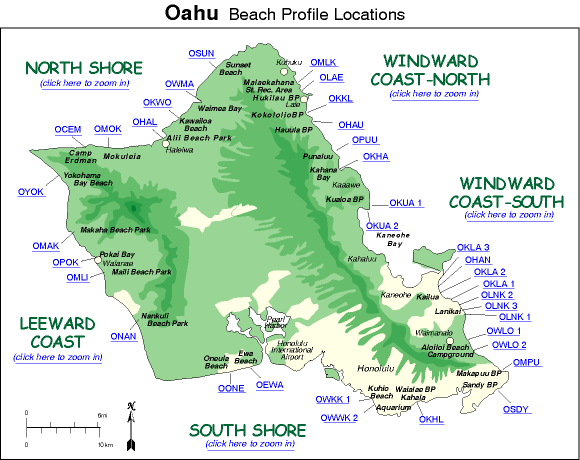

In [9]:
# extract index map
index_url =  [x for x in the_json['_source']['links_s'] if ("index" in x)][0]
the_page = requests.get(index_url)
import re
matched = re.search("INDEX_GIFS[^\"]*",the_page.text)
index_map_img_url = os.path.dirname(index_url) + "/" + matched.group(0)
#print(index_url)
#print (matched.group(0))
#print(index_map_img_url)
Image(index_map_img_url)

In [40]:
import csv
profile_csv = df['Profile'][0]
csv_raw = requests.get(profile_csv)
csv_raw.encoding = 'utf-8'
reader = csv.reader(csv_raw.text.splitlines(),delimiter=",")
raw_data = list(reader)

In [41]:
# extract survey date
survey_date = [x.replace(' ','') for x in raw_data[0] if "/" in x]
print(survey_date)
line_num = [x.replace('?','') for x in raw_data[0] if "LINE" in x]
print(line_num)

['8/11/94', '1/17/95', '9/14/95', '3/4/96', '3/2/97', '8/6/97', '12/29/97', '7/21/98', '1/29/99', '7/9/99']
['LINE A', 'LINE A', 'LINE A', 'LINE B', 'LINE B', 'LINE A', 'LINE A', 'LINE A', 'LINE A', 'LINE A']


In [42]:
datalen = len(raw_data[0])
newdata=[row for row in raw_data[2:] if len(row)==datalen]

In [43]:
df1 = pd.DataFrame(newdata,columns=raw_data[1])
df1

,PT.#,X(m),Y(m),Z(m),Z(m-LT),Difference relative to 3/4/96 (z-mar96),COMMENTS,PT.#,X(m),Y(m),...,Z(m-LT),Difference relative to 8/6/97 (z-aug-97),COMMENTS,PT.#,X(m),Y(m),Z(m),Z(m-LT),Difference relative to 9/16/95 (z-sep95),COMMENTS
0,25,-1.997,-0.1,-0.11,4.704,,SOL.OCEM1-1/lndwd.edge.rd,996,0,0,...,4.814,,RP7/BRP.MEDIAN,997,0,0,-3.169,4.814,,RP7/BRP.MEDIAN
1,995,0,0,0,4.814,,(RP4)BRP#4.AVE.,20,7.482,0.116,...,4.761,,SOL.OCEM/AT.FRP,996,8.251,0,-3.237,4.746,0.003,RP8/FRP.MEDIAN
2,26,0.013,-0.079,-0.007,4.807,,ON.BRP#4,995,7.501,0,...,4.73,-0.013,RP8/FRP.MEDIAN,12,15.504,-1.269,-3.7,4.283,,SOL.OCEM/GRASS
3,27,7.484,0.013,-0.083,4.731,,ON.FRP#3,21,10.712,-0.082,...,4.666,,EB/SWRD.EDGE.RD,13,23.999,-0.742,-3.855,4.128,,EB
4,996,7.5,0,-0.084,4.73,,(RP3)FRP#3.AVE.,22,17.104,0.5,...,4.561,,,14,31.925,0.212,-3.828,4.155,,
5,28,10.236,-0.083,-0.265,4.549,,,23,26.204,0.097,...,4.283,,,15,34.785,0.074,-3.727,4.256,,BC
6,29,12.177,0.134,-0.283,4.531,,,24,30.988,0.376,...,4.121,,,16,36.456,-0.123,-3.86,4.123,,VL
7,30,17.616,-0.144,-0.942,3.872,,,25,34.645,0.911,...,4.158,,,17,38.799,0.128,-4.414,3.569,,
8,31,19.079,-0.202,-0.794,4.02,,,26,37.221,-0.292,...,4.212,,,18,42.246,0.078,-5.016,2.967,,
9,32,20.337,0.223,-0.653,4.161,,,27,41.288,0.729,...,4.239,,,19,46.392,-0.007,-5.685,2.298,,


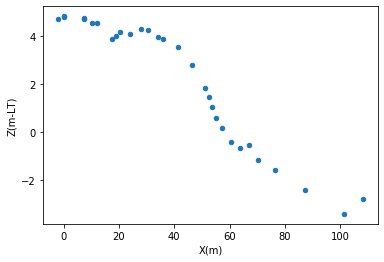

In [93]:
dfp2=df1.iloc[:,[1,4]].astype(float)
dfp2.plot.scatter(x='X(m)',y='Z(m-LT)')